# Impact of sanity in Tobamovirus pathosystem

## Introduction

In this notebook, the impact of sanity will be evaluated for each of the different genotypes.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
sns.set_style('whitegrid')
sns.set_palette('tab20')

In [15]:
try :
    del  sanity_data
except NameError:
    pass
pathotypes = ['P0', 'P12', 'P123']
sanity_values = 10 ** np.arange(-2.0, 0.25, 0.25)
for patho in pathotypes:
    for san_index in range(len(sanity_values)) :
        temp = pd.read_csv('../run2/sanity_%d_%s/timeSeriesStatistics_%s.csv' % (san_index, patho, patho))
        temp['sanity'] = sanity_values[san_index]
        temp['sanity_index'] = san_index
        temp['sim'] = temp['sim '].copy()
        temp['epidemic_time'] = temp['crop']*180 + temp['time']
        temp['pathotype']     = patho
        del temp['sim ']
        try:
            sanity_data = pd.concat((sanity_data, temp))
        except NameError:
            sanity_data = temp
        


## Analysis of dammage by sanity index

In [16]:
sanity_dammage = sanity_data.groupby(['crop', 'sanity_index', 'sim', 'pathotype'], as_index=False).max()
#sanity_dammage

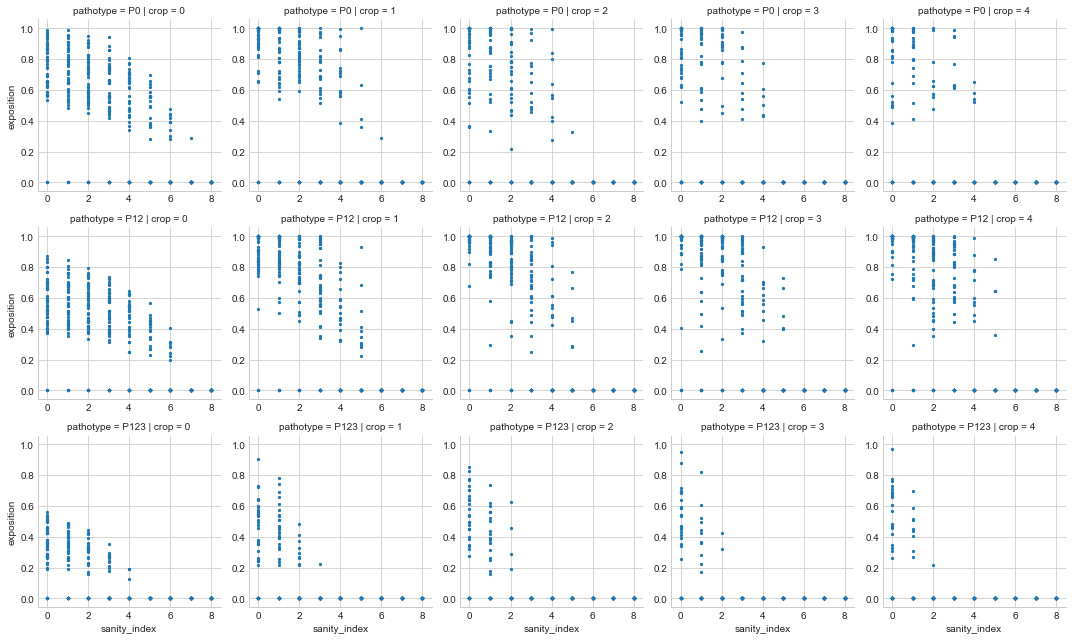

In [17]:
g = sns.FacetGrid(col='crop',row='pathotype', data=sanity_dammage)
g.map(plt.scatter, "sanity_index", "exposition", s = 5)
plt.show()

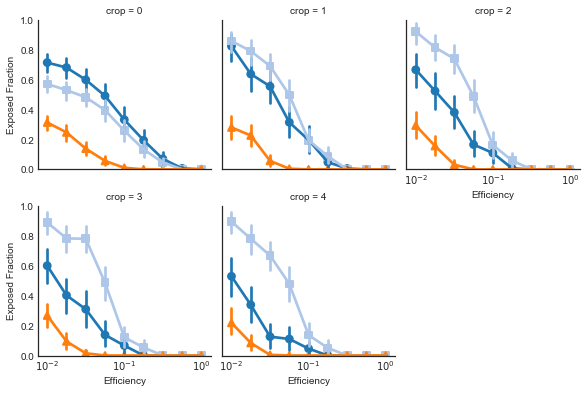

In [19]:
sns.set_style('white')

sanity_dammage_mean = sanity_dammage.groupby(['sanity_index', 'crop', 'pathotype'], as_index=False).mean()
#sanity_dammage_mean = sanity_dammage_mean[sanity_dammage_mean['crop'].isin([0,1,2,3])]
x_ticklabels = ['$10^{-2}$', '', '', '', '$10^{-1}$', '', '', '', '$10^{0}$']
g = sns.FacetGrid(col='crop',hue='pathotype', data=sanity_dammage, col_wrap=3, size=2.75, ylim=(0,1),
                 hue_kws=dict(markers=["o", "s", "^"]))
g = g.map(sns.pointplot, "sanity_index", "exposition", lw = 1.0, marker='o', ci=95)
g.set_xlabels('Efficiency')
g.set_ylabels('Exposed Fraction')
g.set_xticklabels(x_ticklabels)

#g.set_xticklabels(['$10^{%3.2f}$' % i for i in np.arange(-2.0, 0.25, 0.25)], rotation=45)
#g.add_legend()
g.savefig('C:/Users/Bruno/Dropbox/ARTICULOS/cpv_2016/figures/figure_3.png', dpi=300)
plt.show()


## Analysis of $R_{0}$ by sanity index

In [37]:
from scipy.optimize import minimize
class SI_r0:
    def __init__(self, **parameters):
        self.__I = parameters['I']

        self.__S = parameters['S']
        self.__I0 = parameters['I0']
        self.__time = parameters['time']
    def simulate(self,x):
        beta = x[0]
        mu = x[1]
        I = np.zeros(self.__time)
        S = np.zeros(self.__time)
        I[0]= self.__I0
        S[0] = 1- I[0]
        for i in range(1,self.__time):
            I[i] = I[i-1] + beta*I[i-1]*S[i-1] - mu*I[i-1]
            S[i] = S[i-1] - beta*I[i-1]*S[i-1]
        return I,S
    def getVal(self,x):
        I,S = self.simulate(x)
        functional = ((I - self.__I) ** 2) + ((S - self.__S) ** 2)
        return np.sum(functional)
    def optimize(self,x0):
        res = minimize(self.getVal, x0, method='Nelder-Mead', tol=1e-6)
        return res.x
def getR2(I,S):
    model = SI_r0(I=I, S=S, I0=0.0001, time=180)
    x0 = [0.1, 0.025]
    x = model.optimize(x0)
    return x[0] / x[1]
        

In [38]:
sanity_r2 = sanity_data.query('crop==0').groupby(['crop', 
                                                  'sanity_index', 
                                                  'sim', 
                                                  'pathotype'], as_index=False).apply(lambda x : getR2(x['infective'], x['alive']-x['infective']))

In [43]:
r2 = pd.DataFrame(sanity_r2)
r2.reset_index(level=0, inplace=True)
r2.reset_index(level=0, inplace=True)
r2.reset_index(level=0, inplace=True)
r2.reset_index(level=0, inplace=True)
r2.columns = ['pathotype', 'sim', 'sanity_index', 'crop', 'r2']
r2

,pathotype,sim,sanity_index,crop,r2
0,P0,0,0,0,1.469034
1,P12,0,0,0,1.830651
2,P123,0,0,0,1.229927
3,P0,1,0,0,1.771391
4,P12,1,0,0,2.466579
5,P123,1,0,0,1.626502
6,P0,2,0,0,1.982407
7,P12,2,0,0,2.500067
8,P123,2,0,0,1.463928
9,P0,3,0,0,2.231979


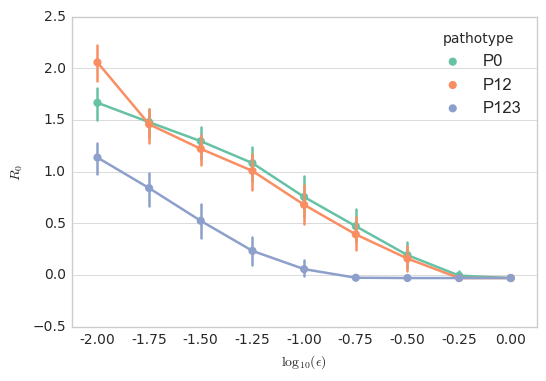

In [51]:
fig, ax = plt.subplots(1)
sns.pointplot(x = 'sanity_index', y='r2', hue='pathotype', data = r2, ax = ax)
ax.set_xticklabels(['%3.2f' % i for i in np.arange(-2.0, 0.25, 0.25)])
ax.set_ylabel('$R_{0}$')
ax.set_xlabel('$\log_{10}(\epsilon)$')
plt.show()

In [32]:
np.sum(sanity_data.duplicated(subset=['crop', 'sanity_index', 'sim', 'pathotype', 'time']))


3645000

In [5]:
sanity_data[:10]

,crop,time,exposition,infective,alive,inoculum,sanity,sanity_index,sim,epidemic_time,pathotype
0,0,0,0.0001,0.0000,1.0000,0.00,0.01,0,30,0,P0
1,0,1,0.0001,0.0000,1.0000,0.00,0.01,0,30,1,P0
2,0,2,0.0001,0.0000,1.0000,0.00,0.01,0,30,2,P0
3,0,3,0.0001,0.0000,1.0000,0.00,0.01,0,30,3,P0
4,0,4,0.0001,0.0000,1.0000,0.00,0.01,0,30,4,P0
5,0,5,0.0001,0.0000,1.0000,0.00,0.01,0,30,5,P0
6,0,6,0.0001,0.0001,1.0000,0.00,0.01,0,30,6,P0
7,0,7,0.0007,0.0000,0.9999,2718000.00,0.01,0,30,7,P0
8,0,8,0.0007,0.0000,0.9999,2462508.00,0.01,0,30,8,P0
9,0,9,0.0007,0.0000,0.9999,2231032.25,0.01,0,30,9,P0
